# Rendered Actions Visualizations

This notebook explains and visualizes actions rendered in a RLBench dataset. If you follow the instructions in README, you should be able to have similar results. After running `render_data.py`, you should have a directory of the following structure:

<pre>
📦test_rlbench_data_rgb_rendered
 ┣ 📂take_lid_off_saucepan
 ┃ ┗ 📂variation0
 ┃ ┃ ┣ 📂episodes
 ┃ ┃ ┃ ┗ 📂episode0
 ┃ ┃ ┃ ┃ ┣ 📂front_depth
 ┃ ┃ ┃ ┃ ┣ 📂front_mask
 ┃ ┃ ┃ ┃ ┣ 📂front_rgb
 ┃ ┃ ┃ ┃ ┣ 📂left_shoulder_depth
 ┃ ┃ ┃ ┃ ┣ 📂left_shoulder_mask
 ┃ ┃ ┃ ┃ ┣ 📂left_shoulder_rgb
 ┃ ┃ ┃ ┃ ┣ 📂overhead_depth
 ┃ ┃ ┃ ┃ ┣ 📂overhead_mask
 ┃ ┃ ┃ ┃ ┣ 📂overhead_rgb
 ┃ ┃ ┃ ┃ ┣ 📂right_shoulder_depth
 ┃ ┃ ┃ ┃ ┣ 📂right_shoulder_mask
 ┃ ┃ ┃ ┃ ┣ 📂right_shoulder_rgb
 ┃ ┃ ┃ ┃ ┣ 📂tiled_rgb
 ┃ ┃ ┃ ┃ ┣ 📂tiled_rgb_rendered
 ┃ ┃ ┃ ┃ ┣ 📂wrist_depth
 ┃ ┃ ┃ ┃ ┣ 📂wrist_mask
 ┃ ┃ ┃ ┃ ┣ 📂wrist_rgb
 ┃ ┃ ┃ ┃ ┗ 📜low_dim_obs.pkl
 ┃ ┃ ┗ 📜variation_descriptions.pkl
  ┃ ┃ ┃ ┗ 📂episode1
   ┃ ┃ ┃ ┃ ┣ 📂....
 ┗ 📜render_data_config.yaml
 </pre>

In [27]:
from IPython.display import display, HTML
from PIL import Image
import random
import os

def list_and_select_png_files(directory, k):
    # List all files in the given directory
    all_files = os.listdir(directory)
    
    # Filter out the PNG files and get their full paths
    png_files = [os.path.join(directory, file) for file in all_files if file.lower().endswith('.png')]
    
    # Randomly select k PNG files
    selected_files = random.sample(png_files, k) if k <= len(png_files) else png_files
    
    return selected_files

def display_images_side_by_side(image_paths):
    images_html = "".join(f'<img src="{img}" width="300px" style="margin:10px; display:inline-block"/>' for img in image_paths)
    display(HTML(images_html))


## Original Data

In [28]:
OG_DATA_PATH = "../render/test_rlbench_data/take_lid_off_saucepan/variation0/episodes/episode0/" # Use your own path
camera_1 = 'wrist_rgb'
camera_2 = 'front_rgb'

In [29]:
image_paths = list_and_select_png_files(os.path.join(OG_DATA_PATH, camera_1), 4)
display_images_side_by_side(image_paths)

In [30]:
image_paths = list_and_select_png_files(os.path.join(OG_DATA_PATH, camera_2), 4)
display_images_side_by_side(image_paths)

## Rendered Data - Full Context

In [16]:
RENDERED_FC_DATA_PATH = "../test_rlbench_data_rgb_rendered/take_lid_off_saucepan/variation0/episodes/episode0/" # Use your own path
camera_1 = 'wrist_rgb'
camera_2 = 'front_rgb'

In [31]:
image_paths = list_and_select_png_files(os.path.join(RENDERED_FC_DATA_PATH, camera_1), 4)
display_images_side_by_side(image_paths)

In [33]:
image_paths = list_and_select_png_files(os.path.join(RENDERED_FC_DATA_PATH, camera_2), 4)
display_images_side_by_side(image_paths)

## Rendered Data - Random Context

In [20]:
RENDERED_RC_DATA_PATH = "../test_rlbench_data_rnd_bg/take_lid_off_saucepan/variation0/episodes/episode0/" # Use your own path
camera_1 = 'wrist_rgb'
camera_2 = 'front_rgb'

In [34]:
image_paths = list_and_select_png_files(os.path.join(RENDERED_RC_DATA_PATH, camera_1), 4)
display_images_side_by_side(image_paths)

In [35]:
image_paths = list_and_select_png_files(os.path.join(RENDERED_RC_DATA_PATH, camera_2), 4)
display_images_side_by_side(image_paths)

## Tiled Data

In [36]:
TILED_RGB_DATA_PATH = "../test_rlbench_data_rnd_bg/take_lid_off_saucepan/variation0/episodes/episode0/tiled_rgb" # Use your own path
image_paths = list_and_select_png_files(TILED_RGB_DATA_PATH, 4)
display_images_side_by_side(image_paths)

In [37]:
TILED_RGB_RENDERED_DATA_PATH = "../test_rlbench_data_rnd_bg/take_lid_off_saucepan/variation0/episodes/episode0/tiled_rgb_rendered" # Use your own path
image_paths = list_and_select_png_files(TILED_RGB_RENDERED_DATA_PATH, 4)
display_images_side_by_side(image_paths)

## Visualize Trajectories

In [51]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

TASK = 'phone_on_base'
DATA_DIR = f"../render/test_rlbench_data/{TASK}/variation0/episodes/" 

# Create a list of colors for the lines
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']

In [52]:
EPISODES = 5

all_ee_poses, all_joint_positions, all_joint_velocities, all_gripper_opens = [], [], [], []
for episode in range(len(os.listdir(DATA_DIR)))[:EPISODES]:
    episode_path = os.path.join(DATA_DIR, f'episode{episode}')
    low_dim_obs_path = os.path.join(episode_path, 'low_dim_obs.pkl')

    try:
        with open(low_dim_obs_path, 'rb') as f:
            low_dim_obs = pickle.load(f)
    except Exception as e:
        print(f"Skipping {low_dim_obs_path} because {e}")
        continue

    joint_positions = []
    joint_velocities = []
    gripper_poses = []
    gripper_open = []
    for f_idx, obs in enumerate(low_dim_obs):
        joint_positions.append(obs.misc['executed_demo_joint_position_action'] if 'executed_demo_joint_position_action' in obs.misc else obs.joint_positions)
        joint_velocities.append(obs.joint_velocities)
        gripper_poses.append(obs.gripper_pose)
        gripper_open.append(obs.gripper_open)

        # if 'executed_demo_joint_position_action' not in obs.misc:
        #     print(f"skip frame{f_idx}")

    joint_positions = np.array(joint_positions)
    joint_velocities = np.array(joint_velocities)
    gripper_poses = np.array(gripper_poses)

    all_joint_positions.append(joint_positions)
    all_joint_velocities.append(joint_velocities)
    all_ee_poses.append(gripper_poses)
    all_gripper_opens.append(gripper_open)

    joints = np.arange(joint_positions.shape[-1])
    max_steps = joint_positions.shape[0]

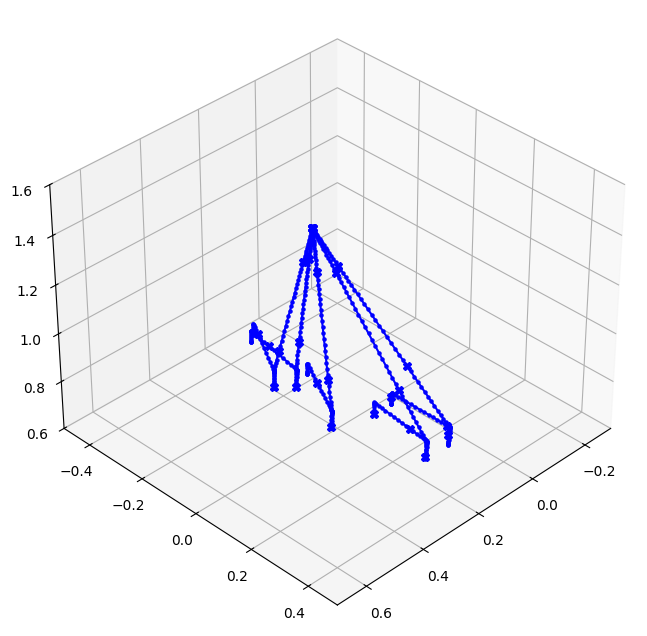

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and 3D axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

N_PLOT = 5
for ee, joint, gripper_open in zip(all_ee_poses[:N_PLOT], all_joint_positions[:N_PLOT], all_gripper_opens[:N_PLOT]):
    ee_pos = ee[:,:3]
    gripper = joint[:,-1]
    # ee_pos = ee[-10:]
    # Extract x, y, and z coordinates from the ee_pos array
    x, y, z = ee_pos[:, 0], ee_pos[:, 1], ee_pos[:, 2]
    
    # Create a 3D scatter plot
    markevery = 1
    # scatter = ax.plot(x, y, z, alpha=0.3, marker='.', markevery=5)
    for i in range(0, len(x), markevery):
            color = 'blue'
            ax.scatter(x[i], y[i], z[i], c=color, marker='.', alpha=1.0)

    ax.plot(x, y, z, alpha=1.0, marker='X', markevery=20, color='blue')

ax.view_init(35, 45)
# ax.view_init(90, 0)

ax.set_xlim([-0.3, 0.7])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([ 0.6, 1.6])
plt.show()